<a href="https://colab.research.google.com/github/pcsilcan/ca/blob/master/20202/ca_20202_0502_bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import networkx as nx
from queue import Queue

In [2]:
def bfs(G, s):
    n = len(G)
    color = ['white']*n
    d = [math.inf]*n
    π = [None]*n
    Q = Queue()

    color[s] = 'gray'
    d[s] = 0
    Q.put(s)
    while not Q.empty():
        u = Q.get()
        for v in G[u]:
            if color[v] == 'white':
                color[v] = 'gray'
                d[v] = d[u] + 1
                π[v] = u
                Q.put(v)
        color[u] = 'black'

    return π, d, color

## Algunas funciones útiles copiadas de otro ejeplo

In [3]:
def readAL2(filename):
    V = []
    Vx = {}
    with open(filename) as f:
        lines = f.readlines()
    u = 0
    for line in lines:
        V.append(line.strip().split(':')[0])
        Vx[V[-1]] = u
        u += 1
    G = [None for _ in range(len(V))]
    u = 0
    for line in lines:
        G[u] = [Vx[a] for a in line.strip().split(':')[1].strip().split()]
        u += 1

    return V, G, Vx

def drawAL2(V, G):
    gx = nx.Graph()
    nv = len(G)
    gx.add_nodes_from(V)
    for u in range(nv):
        for v in G[u]:
            gx.add_edge(V[u], V[v])
    nx.draw(gx,
            with_labels=True,
            node_color='orange',
            alpha=0.90,
            node_size=1000,
            node_shape='o',
            pos=nx.circular_layout(gx))

In [4]:
%%writefile graph.al2
r: s v
s: r w
t: u w x
u: t x y
v: r
w: s t x
x: t u w y
y: u x

Overwriting graph.al2


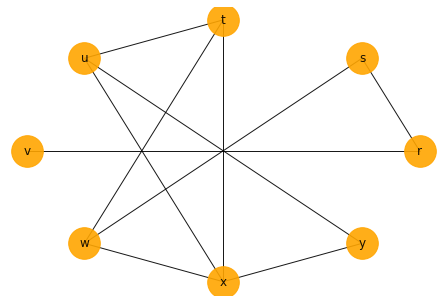

In [5]:
V, G, Vx = readAL2('graph.al2')
drawAL2(V, G)

u  |  π  |  d  |  color  
---|-----|-----|-------
r  |  s  |  1  | NEGROS
s  |  N  |  0  | GRIS
t  |  N  |  ∞  | BLANCO
u  |  N  |  ∞  | NEGRO
v  |  r  |  2  | GRIS
w  |  s  |  1  | GRIS
x  |  N  |  ∞  | BLANCO
y  |  N  |  ∞  | BLANCO


Q = w, v

u = r

In [9]:
π, d, color = bfs(G, Vx['s'])
print({V[u]:V[v] if v != None else None for u,v in enumerate(π)})
print(d)
print(color)

{'r': 's', 's': None, 't': 'w', 'u': 't', 'v': 'r', 'w': 's', 'x': 'w', 'y': 'x'}
[1, 0, 2, 3, 2, 1, 2, 3]
['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
